In this Section we will do EDA including training and finding the best model to be deployed to our website.
To be noted, we need to find the right ML model to recommend product to our customer based on availble variables. So we need to explore the dataset first and then we do "Feature engineering" and the last step we find what is the best model to use for our recommendation system.
We use the newest dataset that we obtained from generating the old dataset.

In [2]:
#read dataset
import pandas as pd
df = pd.read_csv("FixedDataset.csv")

In [3]:
df = df.drop(df.columns[0], axis=1)

In [3]:
df.head(5)

,customer_id,page_views,time_spent,product_id,purchase_date,category,price,ratings
0,1,25,120,101,2023-01-01,Electronics,500,4.5
1,1,25,120,101,2023-01-01,Electronics,500,4.5
2,1,25,120,101,2023-01-01,Electronics,500,4.5
3,1,25,120,101,2023-01-01,Electronics,500,4.5
4,1,25,120,101,2023-01-01,Electronics,500,4.5


In [6]:
#counting the total customer based on their id
df['customer_id'].nunique()

82

In [7]:
df = df.drop_duplicates() #drop duplicates data

Shape of the dataset: (190, 8)

Columns in the dataset: Index(['customer_id', 'page_views', 'time_spent', 'product_id',
       'purchase_date', 'category', 'price', 'ratings'],
      dtype='object')

Data types of columns:
 customer_id        int64
page_views         int64
time_spent         int64
product_id         int64
purchase_date     object
category          object
price              int64
ratings          float64
dtype: object

Summary Statistics:
        customer_id  page_views  time_spent  product_id       price     ratings
count   190.000000  190.000000  190.000000  190.000000  190.000000  190.000000
mean     39.494737   19.836842   81.821053   81.542105  269.947368    3.254211
std      32.008555   10.594483   44.230512   39.829741  184.611554    1.129011
min       1.000000    1.000000    1.000000    2.000000   13.000000    1.000000
25%       5.000000   12.000000   43.750000   49.000000  104.250000    2.325000
50%      33.500000   20.000000   83.500000   99.500000  261.500000

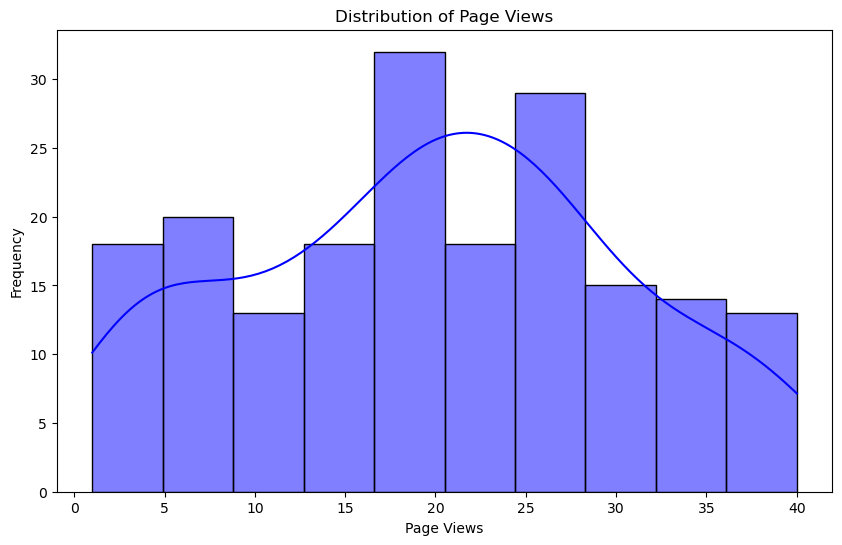

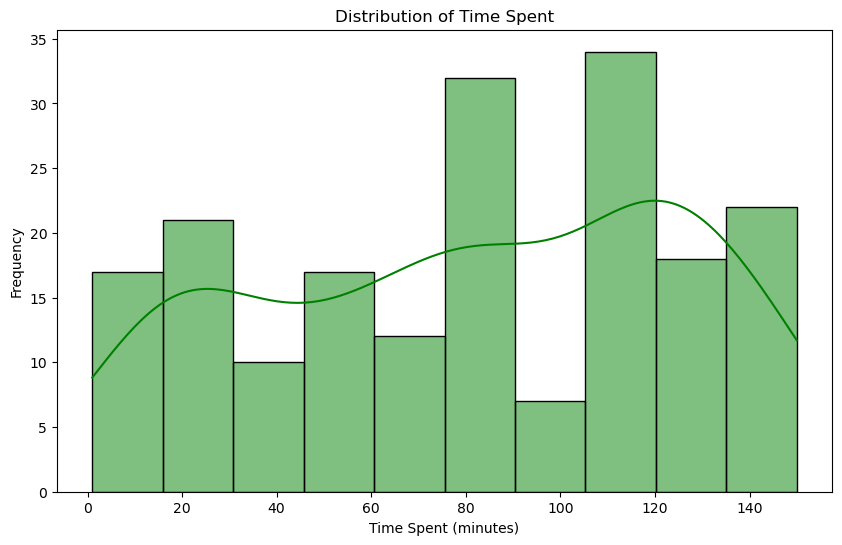

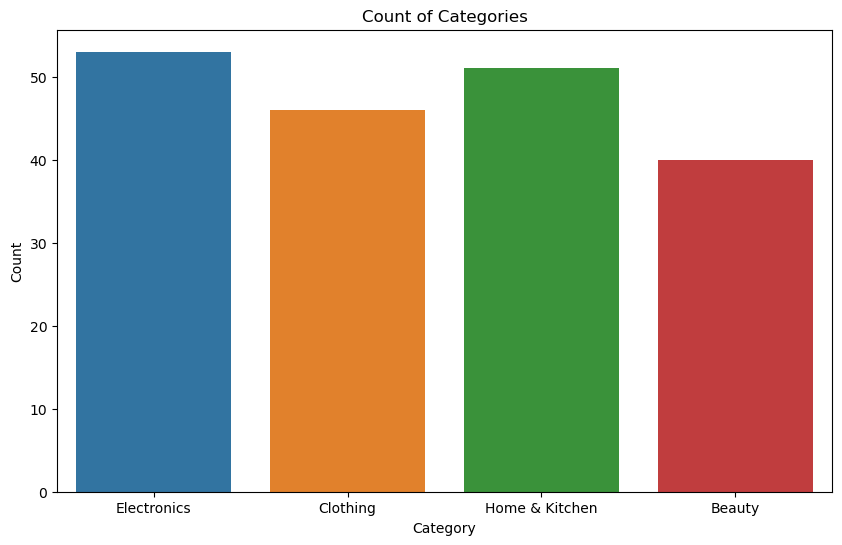

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display basic information about the dataset
print("Shape of the dataset:", df.shape)
print("\nColumns in the dataset:", df.columns)
print("\nData types of columns:\n", df.dtypes)

# Display summary statistics
print("\nSummary Statistics:\n", df.describe())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print("\nDuplicate Rows:\n", duplicate_rows)

# Visualize distribution of numerical features
plt.figure(figsize=(10, 6))
sns.histplot(df['page_views'], bins=10, kde=True, color='blue')
plt.title('Distribution of Page Views')
plt.xlabel('Page Views')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['time_spent'], bins=10, kde=True, color='green')
plt.title('Distribution of Time Spent')
plt.xlabel('Time Spent (minutes)')
plt.ylabel('Frequency')
plt.show()

# Visualize categorical features
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='category')
plt.title('Count of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


On section above I  do some EDA method to gain basic information about the data. Those are :
- Displays basic information about the dataset such as shape, columns, and data types.
- Displays summary statistics for numerical features.
- Checks for missing values in the dataset.
- Checks for duplicate rows in the dataset.
- Visualizes the distribution of numerical features (page_views and time_spent) using histograms.
- Visualizes the count of categories using a bar plot.
- You can further customize and expand this code based on your specific analysis requirements. Additionally, you may need to install the 
- required libraries such as pandas, matplotlib, and seaborn if you haven't already installed them.

<Figure size 800x600 with 0 Axes>

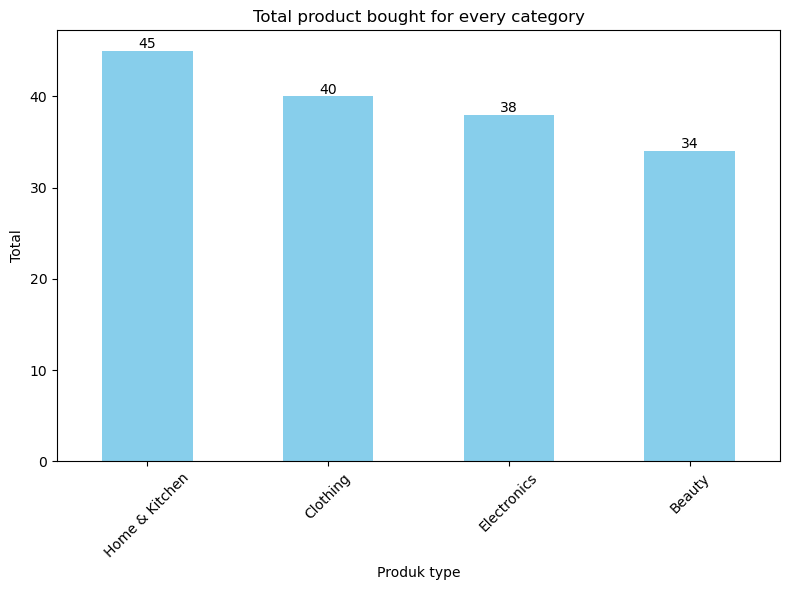

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Buat grafik batang dengan seaborn
plt.figure(figsize=(8, 6))
plt.figure(figsize=(8, 6))
counts = df['category'].value_counts()
bars = counts.plot(kind='bar', color='skyblue')
plt.title('Total product bought for every category')
plt.xlabel('Produk type')
plt.ylabel('Total')
plt.xticks(rotation=45)  # x label rotation

for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.0f'),
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='center',
                 xytext=(0, 5),
                 textcoords='offset points')

plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

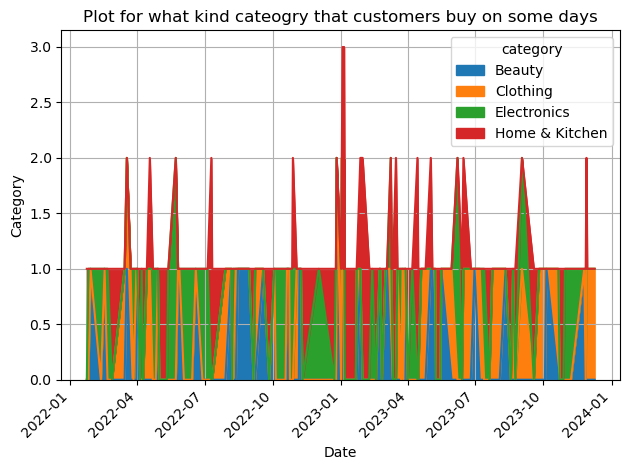

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df['purchase_date'] = pd.to_datetime(df['purchase_date'])

# Hitung jumlah pembelian untuk setiap kategori produk pada setiap tanggal
purchase_counts = df.groupby(['purchase_date', 'category']).size().unstack(fill_value=0)

# Buat grafik area stacked
plt.figure(figsize=(10, 6))
purchase_counts.plot(kind='area', stacked=True)
plt.title('Plot for what kind cateogry that customers buy on some days')
plt.xlabel('Date')
plt.ylabel('Category')
plt.xticks(rotation=45)  # Putar label sumbu x untuk legibilitas
plt.grid(True)
plt.tight_layout()
plt.show()



Conclution

from the graphs above, we can see some distribution of customer's actions such as the distribution of how many time they visited the website, and then the total purchase of each product by all customers, etc.

- for the Home & KItchen product category reach the peak of sells in January 2023 and from all categories, this category is most favorite one to be bought by customer.

- for the page views averagely customers view the page 25 times. But at frequently custumers view the page 20 times.

- Averagely customers spent 100-120 minutes on the websites, hopefully by getting this information we van improve the marketing performance and recommend the right product for customers need